# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (25, 50)
lng_range = (-70, -130)
print(nrel_key)

qBvAmHMh0HYOU2goxPsWWFYxc5adueX99kVIFbbn


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


1329

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
#daily weather request
url = "http://api.openweathermap.org/data/2.5/weather?"
# #annual weather request
# url = "https://history.openweathermap.org/data/2.5/aggregated/year?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        returned_city.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        missing+=1
        print(f'City {city} not found. Skipping, total not found = {missing}')
    if count+missing >=1000:
        break
    
#     time.sleep(2)
      

Processing Recored 1 of 1329 | puerto penasco
Processing Recored 2 of 1329 | cockburn town
Processing Recored 3 of 1329 | san felipe
Processing Recored 4 of 1329 | princeton
Processing Recored 5 of 1329 | deloraine
Processing Recored 6 of 1329 | port hardy
Processing Recored 7 of 1329 | thetford mines
Processing Recored 8 of 1329 | lompoc
Processing Recored 9 of 1329 | ridgecrest
City tlahualilo not found. Skipping, total not found = 1
Processing Recored 10 of 1329 | tuckahoe
Processing Recored 11 of 1329 | farmington
Processing Recored 12 of 1329 | georgetown
Processing Recored 13 of 1329 | elliot lake
Processing Recored 14 of 1329 | chambersburg
Processing Recored 15 of 1329 | virginia beach
Processing Recored 16 of 1329 | creel
Processing Recored 17 of 1329 | matamoros
Processing Recored 18 of 1329 | grants pass
Processing Recored 19 of 1329 | lewistown
Processing Recored 20 of 1329 | traverse city
Processing Recored 21 of 1329 | dixon
Processing Recored 22 of 1329 | miles city
Proc

Processing Recored 194 of 1329 | sandpoint
Processing Recored 195 of 1329 | duluth
Processing Recored 196 of 1329 | redding
Processing Recored 197 of 1329 | brownwood
Processing Recored 198 of 1329 | coos bay
Processing Recored 199 of 1329 | lehigh acres
Processing Recored 200 of 1329 | callaway
Processing Recored 201 of 1329 | north myrtle beach
Processing Recored 202 of 1329 | haileybury
Processing Recored 203 of 1329 | wiarton
Processing Recored 204 of 1329 | lexington park
Processing Recored 205 of 1329 | scottsbluff
Processing Recored 206 of 1329 | florence
Processing Recored 207 of 1329 | benjamin hill
Processing Recored 208 of 1329 | torrington
Processing Recored 209 of 1329 | grand island
Processing Recored 210 of 1329 | norwalk
Processing Recored 211 of 1329 | etchojoa
Processing Recored 212 of 1329 | chapais
Processing Recored 213 of 1329 | nassau
Processing Recored 214 of 1329 | benton harbor
Processing Recored 215 of 1329 | athens
Processing Recored 216 of 1329 | parsons
Pr

Processing Recored 386 of 1329 | sheboygan
Processing Recored 387 of 1329 | belle glade
Processing Recored 388 of 1329 | south sioux city
Processing Recored 389 of 1329 | alpena
Processing Recored 390 of 1329 | silver city
Processing Recored 391 of 1329 | el dorado
Processing Recored 392 of 1329 | aldine
Processing Recored 393 of 1329 | baie-saint-paul
Processing Recored 394 of 1329 | exeter
Processing Recored 395 of 1329 | hutchinson
Processing Recored 396 of 1329 | kendallville
Processing Recored 397 of 1329 | doctor phillips
Processing Recored 398 of 1329 | steinbach
Processing Recored 399 of 1329 | saint-donat-de-montcalm
Processing Recored 400 of 1329 | mineral wells
Processing Recored 401 of 1329 | ruston
Processing Recored 402 of 1329 | rumford
Processing Recored 403 of 1329 | nantucket
Processing Recored 404 of 1329 | beacon
Processing Recored 405 of 1329 | fishers
Processing Recored 406 of 1329 | carlisle
Processing Recored 407 of 1329 | chihuahua
Processing Recored 408 of 132

Processing Recored 577 of 1329 | taylorville
City muzquiz not found. Skipping, total not found = 3
Processing Recored 578 of 1329 | dzilam gonzalez
Processing Recored 579 of 1329 | lincoln
Processing Recored 580 of 1329 | portland
Processing Recored 581 of 1329 | cave spring
Processing Recored 582 of 1329 | amherst center
Processing Recored 583 of 1329 | atascocita
Processing Recored 584 of 1329 | austin
Processing Recored 585 of 1329 | batavia
Processing Recored 586 of 1329 | gull lake
Processing Recored 587 of 1329 | clive
Processing Recored 588 of 1329 | sherman
Processing Recored 589 of 1329 | loreto
Processing Recored 590 of 1329 | canyon lake
Processing Recored 591 of 1329 | amos
Processing Recored 592 of 1329 | englewood
Processing Recored 593 of 1329 | fort collins
Processing Recored 594 of 1329 | garza garcia
Processing Recored 595 of 1329 | adolfo lopez mateos
Processing Recored 596 of 1329 | austintown
Processing Recored 597 of 1329 | roseland
Processing Recored 598 of 1329 

Processing Recored 766 of 1329 | paisley
Processing Recored 767 of 1329 | lynnwood
Processing Recored 768 of 1329 | corinth
Processing Recored 769 of 1329 | virden
Processing Recored 770 of 1329 | belle fourche
Processing Recored 771 of 1329 | lively
Processing Recored 772 of 1329 | greensburg
Processing Recored 773 of 1329 | escanaba
Processing Recored 774 of 1329 | villa union
Processing Recored 775 of 1329 | borger
Processing Recored 776 of 1329 | whitefish
Processing Recored 777 of 1329 | fuquay-varina
Processing Recored 778 of 1329 | canton
Processing Recored 779 of 1329 | saint-ambroise
Processing Recored 780 of 1329 | rantoul
Processing Recored 781 of 1329 | palm coast
Processing Recored 782 of 1329 | creston
Processing Recored 783 of 1329 | ames
Processing Recored 784 of 1329 | fort payne
Processing Recored 785 of 1329 | pueblo
Processing Recored 786 of 1329 | worthington
Processing Recored 787 of 1329 | statesboro
Processing Recored 788 of 1329 | saint-jovite
Processing Recore

Processing Recored 955 of 1329 | nelson
Processing Recored 956 of 1329 | waseca
Processing Recored 957 of 1329 | rock sound
Processing Recored 958 of 1329 | viesca
Processing Recored 959 of 1329 | bloomingdale
Processing Recored 960 of 1329 | el paso
Processing Recored 961 of 1329 | holt
Processing Recored 962 of 1329 | lubbock
Processing Recored 963 of 1329 | searcy
Processing Recored 964 of 1329 | melita
Processing Recored 965 of 1329 | two rivers
Processing Recored 966 of 1329 | castle rock
Processing Recored 967 of 1329 | forest hills
Processing Recored 968 of 1329 | clemson
Processing Recored 969 of 1329 | andros town
Processing Recored 970 of 1329 | hendersonville
Processing Recored 971 of 1329 | caldwell
Processing Recored 972 of 1329 | nadadores
Processing Recored 973 of 1329 | raymondville
Processing Recored 974 of 1329 | starkville
Processing Recored 975 of 1329 | kelso
City ahumada not found. Skipping, total not found = 6
Processing Recored 976 of 1329 | port townsend
Proces

In [6]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
# weather_data=weather_data.round(1)
weather_data.dtypes

City          object
Lat           object
Lng           object
Max_Temp      object
Humidity      object
Cloudiness    object
Wind_Speed    object
Country       object
Date          object
dtype: object

In [7]:
weather_data['Lat']=pd.to_numeric(weather_data['Lat'])
weather_data['Lng']=pd.to_numeric(weather_data['Lng'])
weather_data['Humidity']=pd.to_numeric(weather_data['Humidity'])
weather_data['Cloudiness']=pd.to_numeric(weather_data['Cloudiness'])
weather_data['Wind_Speed']=pd.to_numeric(weather_data['Wind_Speed'])
weather_data['Date']=pd.to_numeric(weather_data['Date'])
weather_data.to_csv('output_data/Exported_weather_data_monthly.csv')
weather_data.describe()

,Lat,Lng,Humidity,Cloudiness,Wind_Speed,Date
count,994.000000,994.000000,994.000000,994.000000,994.000000,9.940000e+02
mean,37.086187,-86.039366,52.336016,37.933602,3.314899,1.596307e+09
std,12.296052,39.088918,19.693977,35.963891,1.902743,1.034881e+02
min,-41.530000,-127.420000,1.000000,0.000000,0.290000,1.596307e+09
25%,32.705000,-106.907500,40.000000,1.000000,2.100000,1.596307e+09
50%,38.985000,-91.640000,52.000000,40.000000,3.100000,1.596308e+09
75%,44.075000,-80.302500,66.000000,75.000000,4.100000,1.596308e+09
max,57.140000,174.780000,100.000000,100.000000,16.480000,1.596308e+09


In [8]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response

In [9]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_jan=[] 
avg_ghi_jan=[] 
avg_lat_tilt_jan=[] 
avg_dni_aug=[] 
avg_ghi_aug=[] 
avg_lat_tilt_aug=[]
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        #monthly average solar pull
        avg_dni_aug.append(response['outputs']['avg_dni']['monthly']['aug'])
        avg_ghi_aug.append(response['outputs']['avg_ghi']['monthly']['aug'])
        avg_lat_tilt_aug.append(response['outputs']['avg_lat_tilt']['monthly']['aug'])
        avg_dni_jan.append(response['outputs']['avg_dni']['monthly']['jan'])
        avg_ghi_jan.append(response['outputs']['avg_ghi']['monthly']['jan'])
        avg_lat_tilt_jan.append(response['outputs']['avg_lat_tilt']['monthly']['jan'])
        #annual monthly solar pill
#         avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
#         avg_ghi_annual.append(response['outputs']['avg_ghi']['annual'])
#         avg_lat_tilt_annual.append(response['outputs']['avg_lat_tilt']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_aug.append("")
        avg_ghi_aug.append("")
        avg_lat_tilt_aug.append("")
        avg_dni_jan.append("")
        avg_ghi_jan.append("")
        avg_lat_tilt_jan.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")
    if count+missing >=1000:
        break

    time.sleep(2)

Solar data not found for Puerto Peñasco. Skipping, total not found = 1
Solar data not found for Cockburn Town. Skipping, total not found = 2
Solar data not found for San Felipe. Skipping, total not found = 3
Processing Recored 1 of 1329 | Princeton
Solar data not found for Deloraine. Skipping, total not found = 4
Solar data not found for Port Hardy. Skipping, total not found = 5
Solar data not found for Thetford Mines. Skipping, total not found = 6
Processing Recored 2 of 1329 | Lompoc
Processing Recored 3 of 1329 | Ridgecrest
Solar data not found for . Skipping, total not found = 7
Processing Recored 4 of 1329 | Tuckahoe
Processing Recored 5 of 1329 | Farmington
Solar data not found for George Town. Skipping, total not found = 8
Solar data not found for Elliot Lake. Skipping, total not found = 9
Processing Recored 6 of 1329 | Chambersburg
Processing Recored 7 of 1329 | Virginia Beach
Solar data not found for Creel. Skipping, total not found = 10
Solar data not found for Matamoros. Ski

Processing Recored 117 of 1329 | Glendive
Processing Recored 118 of 1329 | Fallon
Processing Recored 119 of 1329 | Dubuque
Solar data not found for Atikokan. Skipping, total not found = 50
Solar data not found for Oxford. Skipping, total not found = 51
Solar data not found for Progreso. Skipping, total not found = 52
Processing Recored 120 of 1329 | Salina
Processing Recored 121 of 1329 | St. Marys
Solar data not found for Alexandria. Skipping, total not found = 53
Solar data not found for Terrace Bay. Skipping, total not found = 54
Processing Recored 122 of 1329 | Rodeo
Processing Recored 123 of 1329 | Hibbing
Processing Recored 124 of 1329 | Grand Forks
Processing Recored 125 of 1329 | Flagstaff
Processing Recored 126 of 1329 | Snyder
Processing Recored 127 of 1329 | Douglas
Processing Recored 128 of 1329 | Worland
Processing Recored 129 of 1329 | Rock Hill
Processing Recored 130 of 1329 | Williston
Processing Recored 131 of 1329 | Ukiah
Solar data not found for San Luis. Skipping, t

Processing Recored 224 of 1329 | Klamath Falls
Solar data not found for Wellington. Skipping, total not found = 104
Processing Recored 225 of 1329 | Durham
Processing Recored 226 of 1329 | Ledyard Center
Solar data not found for Thunder Bay. Skipping, total not found = 105
Solar data not found for Toronto. Skipping, total not found = 106
Processing Recored 227 of 1329 | Sault Ste. Marie
Solar data not found for Moscow. Skipping, total not found = 107
Processing Recored 228 of 1329 | Key West
Solar data not found for Ahome. Skipping, total not found = 108
Processing Recored 229 of 1329 | Woodward
Solar data not found for Valentín Gómez Farías. Skipping, total not found = 109
Processing Recored 230 of 1329 | Aransas Pass
Processing Recored 231 of 1329 | Medford
Processing Recored 232 of 1329 | Covington
Solar data not found for Brighton. Skipping, total not found = 110
Solar data not found for Belen. Skipping, total not found = 111
Processing Recored 233 of 1329 | Altamont
Processing Rec

Processing Recored 355 of 1329 | Jackson
Solar data not found for Hornepayne. Skipping, total not found = 141
Processing Recored 356 of 1329 | Maryville
Processing Recored 357 of 1329 | Summerville
Processing Recored 358 of 1329 | Corsicana
Processing Recored 359 of 1329 | Spokane
Processing Recored 360 of 1329 | Sturgeon Bay
Processing Recored 361 of 1329 | Norwood
Solar data not found for Trois-Rivières. Skipping, total not found = 142
Processing Recored 362 of 1329 | Fernandina Beach
Processing Recored 363 of 1329 | Ruidoso
Processing Recored 364 of 1329 | Rockport
Processing Recored 365 of 1329 | Nampa
Processing Recored 366 of 1329 | Point Pleasant
Processing Recored 367 of 1329 | Hayden
Processing Recored 368 of 1329 | Palm Valley
Processing Recored 369 of 1329 | Marshfield
Processing Recored 370 of 1329 | Sheridan
Processing Recored 371 of 1329 | Sunrise Manor
Processing Recored 372 of 1329 | Northampton
Processing Recored 373 of 1329 | Hope
Processing Recored 374 of 1329 | Lewi

Processing Recored 475 of 1329 | Milledgeville
Processing Recored 476 of 1329 | Sun Valley
Processing Recored 477 of 1329 | Pleasanton
Processing Recored 478 of 1329 | Española
Processing Recored 479 of 1329 | Mayfield Heights
Processing Recored 480 of 1329 | Le Mars
Processing Recored 481 of 1329 | Fort Walton Beach
Processing Recored 482 of 1329 | Cedar Rapids
Processing Recored 483 of 1329 | South Lake Tahoe
Processing Recored 484 of 1329 | Faribault
Processing Recored 485 of 1329 | Sumter
Solar data not found for Ciudad de Allende. Skipping, total not found = 185
Solar data not found for Saint-Prosper. Skipping, total not found = 186
Solar data not found for La Tuque. Skipping, total not found = 187
Solar data not found for Bradford. Skipping, total not found = 188
Solar data not found for Coaldale. Skipping, total not found = 189
Processing Recored 486 of 1329 | Fountain Hills
Processing Recored 487 of 1329 | Utica
Processing Recored 488 of 1329 | Hailey
Processing Recored 489 of 

Solar data not found for Mina. Skipping, total not found = 221
Solar data not found for Hawkesbury. Skipping, total not found = 222
Processing Recored 608 of 1329 | Belton
Processing Recored 609 of 1329 | Cordele
Processing Recored 610 of 1329 | Statesville
Processing Recored 611 of 1329 | Bullhead City
Solar data not found for Shawville. Skipping, total not found = 223
Solar data not found for Oxbow. Skipping, total not found = 224
Processing Recored 612 of 1329 | Spring Hill
Processing Recored 613 of 1329 | Bloomsburg
Solar data not found for Gravenhurst. Skipping, total not found = 225
Solar data not found for Portsmouth. Skipping, total not found = 226
Processing Recored 614 of 1329 | Bellevue
Processing Recored 615 of 1329 | Port Charlotte
Processing Recored 616 of 1329 | Zion
Solar data not found for Pierreville. Skipping, total not found = 227
Processing Recored 617 of 1329 | Ingleside
Processing Recored 618 of 1329 | Ontario
Processing Recored 619 of 1329 | San Marcos
Solar dat

Solar data not found for Alma. Skipping, total not found = 277
Solar data not found for Gloucester. Skipping, total not found = 278
Processing Recored 712 of 1329 | Martinsville
Processing Recored 713 of 1329 | Fergus Falls
Processing Recored 714 of 1329 | Saraland
Solar data not found for Cairo. Skipping, total not found = 279
Processing Recored 715 of 1329 | Mashpee
Solar data not found for Brantford. Skipping, total not found = 280
Processing Recored 716 of 1329 | Jesup
Solar data not found for Potam. Skipping, total not found = 281
Processing Recored 717 of 1329 | Woodburn
Processing Recored 718 of 1329 | Somerton
Processing Recored 719 of 1329 | Oskaloosa


In [10]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI Jan":avg_dni_jan,
    "Ave GHI Jan":avg_ghi_jan,
    "Ave Lat Tilt Jan":avg_lat_tilt_jan,
    "Ave DNI Aug":avg_dni_aug,
    "Ave GHI Aug":avg_ghi_aug,
    "Ave Lat Tilt Aug":avg_lat_tilt_aug
    
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI Jan,Ave GHI Jan,Ave Lat Tilt Jan,Ave DNI Aug,Ave GHI Aug,Ave Lat Tilt Aug
0,Puerto Peñasco,31.32,-113.53,31.11,78,27,7.15,MX,1596307463,,,,,,
1,Cockburn Town,21.46,-71.14,29,74,75,8.7,TC,1596307463,,,,,,
2,San Felipe,10.34,-68.74,31.1,52,70,4.54,VE,1596307463,,,,,,
3,Princeton,25.54,-80.41,32,66,20,10.8,US,1596307439,5.18,3.81,5.22,4.26,5.51,5.4
4,Deloraine,-41.53,146.67,10,100,40,4.6,AU,1596307463,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# convert solar data to float
combined_data['Lat']=pd.to_numeric(combined_data['Lat'])
combined_data['Lng']=pd.to_numeric(combined_data['Lng'])
combined_data['Max_Temp']=pd.to_numeric(combined_data['Max_Temp'])
combined_data['Humidity']=pd.to_numeric(combined_data['Humidity'])
combined_data['Cloudiness']=pd.to_numeric(combined_data['Cloudiness'])
combined_data['Wind_Speed']=pd.to_numeric(combined_data['Wind_Speed'])
combined_data['Date']=pd.to_numeric(combined_data['Date'])
combined_data['Ave DNI Jan']=pd.to_numeric(combined_data['Ave DNI Jan'])
combined_data['Ave GHI Jan']=pd.to_numeric(combined_data['Ave GHI Jan'])
combined_data['Ave Lat Tilt Jan']=pd.to_numeric(combined_data['Ave Lat Tilt Jan'])
combined_data['Ave DNI Aug']=pd.to_numeric(combined_data['Ave DNI Aug'])
combined_data['Ave GHI Aug']=pd.to_numeric(combined_data['Ave GHI Aug'])
combined_data['Ave Lat Tilt Aug']=pd.to_numeric(combined_data['Ave Lat Tilt Aug'])
combined_data.to_csv('output_data/Exported_combined_data_monthly.csv')
combined_data.dtypes

City                 object
Lat                 float64
Lng                 float64
Max_Temp            float64
Humidity            float64
Cloudiness          float64
Wind_Speed          float64
Country              object
Date                float64
Ave DNI Jan         float64
Ave GHI Jan         float64
Ave Lat Tilt Jan    float64
Ave DNI Aug         float64
Ave GHI Aug         float64
Ave Lat Tilt Aug    float64
dtype: object

In [12]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI Jan,Ave GHI Jan,Ave Lat Tilt Jan,Ave DNI Aug,Ave GHI Aug,Ave Lat Tilt Aug
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,9.940000e+02,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,37.086187,-86.039366,28.846036,52.336016,37.933602,3.314899,1.596307e+09,3.612170,2.293713,3.813018,5.653574,5.889054,6.004019
std,12.296052,39.088918,5.073642,19.693977,35.963891,1.902743,1.034881e+02,1.297238,0.732073,0.998528,1.380313,0.598775,0.622281
min,-41.530000,-127.420000,8.000000,1.000000,0.000000,0.290000,1.596307e+09,1.140000,0.940000,1.670000,3.570000,4.930000,5.060000
25%,32.705000,-106.907500,26.000000,40.000000,1.000000,2.100000,1.596307e+09,2.625000,1.710000,3.090000,4.520000,5.390000,5.500000
50%,38.985000,-91.640000,29.000000,52.000000,40.000000,3.100000,1.596308e+09,3.430000,2.200000,3.750000,5.180000,5.720000,5.790000
75%,44.075000,-80.302500,32.220000,66.000000,75.000000,4.100000,1.596308e+09,4.320000,2.860000,4.420000,6.600000,6.290000,6.360000
max,57.140000,174.780000,43.330000,100.000000,100.000000,16.480000,1.596308e+09,7.220000,3.920000,6.190000,9.510000,7.480000,7.540000


In [13]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Ave DNI Plot

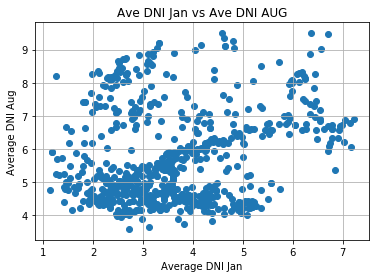

In [28]:
plt.scatter(combined_data["Ave DNI Jan"], combined_data["Ave DNI Aug"])
plt.title('Ave DNI Jan vs Ave DNI AUG')
plt.xlabel('Average DNI Jan')
plt.ylabel('Average DNI Aug')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Ave_DNI.png')

## Latitude vs. Ave GHI Plot

In [15]:
# plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
# plt.title('Latitude vs Ave GHI')
# plt.xlabel('Latitude')
# plt.ylabel('Average GHI')
# plt.grid()

## Latitude vs. Ave Lat Tilt Plot

In [16]:
# plt.scatter(combined_data["Lat"], combined_data["Ave Lat Tilt"])
# plt.title('Latitude vs Ave Lat Tilt')
# plt.xlabel('Latitude')
# plt.ylabel('Average Lat Tilt')
# plt.grid()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
# plot_data=combined_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# xvalue=['Ave GHI']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Northern Latitudes vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()



In [18]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# south=weather_data.loc[(weather_data['Lat']<=0)]
# xvalue=south['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=south[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Southern Latitudea vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()

In [19]:
# # Create Northern and Southern Hemisphere DataFrames
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvaluen=north['Lat']
# south=weather_data.loc[(weather_data['Lat']<0)]
# xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

# xvalue=combined_data['Ave GHI']   
# yvalue=combined_data['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
# regress_values = xvalue * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalue,yvalue)
# plt.plot(xvalue,regress_values,"r-")
# plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Northern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.show()

# print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
# yvalue=south['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Southern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
# plt.show()

# print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
# yvalue=north['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Northern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
# yvalue=south['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Southern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
# yvalue=north['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Northern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
# plt.show()

# print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
# yvalue=south['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Southern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
# plt.show()

# print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
# yvalue=north['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
# yvalue=south['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')
